# Predição de Tráfego em uma Rede usando RNN e Keras

Neste trabalho vou explorar um conjunto de dados de Tráfego de Redes de Computadores para treinar um modelo de Redes Neurais Recorrentes utilizando, entre outras bibliotecas Python, o Theano, com o objetivo de prever o fluxo esperado de cada host dados os n dias anteriores. Dessa forma, poderei comparar o fluxo previsto contra o fluxo atual da rede para avaliar se esse host pertence a um bot (ou agente malicioso) ou não.

## Pré-processamento de Dados

Primeiro vamos organizar os dados do dataset para podermos iniciar os trabalhos com a RNN e Keras. Assim sendo, começamos carregando as bibliotecas necessárias.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

Testando a leitura do arquivo com os dados com a exibição das primeiras duas linhas

In [2]:
df = pd.read_csv('cs448b_ipasn.csv')
df.head(2)

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1


Agora vamos tentar exibir o fluxo total da rede POR DIA, então vamos agrupar os dados POR DATA (yday = dia do ano; wday = dia da semana)


In [3]:
df['date']= pd.to_datetime(df['date'])
df = df.groupby(['date','l_ipn'],as_index=False).sum()

df['yday'] = df['date'].dt.dayofyear
df['wday'] = df['date'].dt.dayofweek

In [4]:
ip0 = df[df['l_ipn']==0]
max0 = np.max(ip0['f'])
ip1 = df[df['l_ipn']==1]
max1 = np.max(ip1['f'])
ip2 = df[df['l_ipn']==2]
max2 = np.max(ip2['f'])
ip3 = df[df['l_ipn']==3]
max3 = np.max(ip3['f'])
ip4 = df[df['l_ipn']==4]
max4 = np.max(ip4['f'])
ip5 = df[df['l_ipn']==5]
max5 = np.max(ip5['f'])
ip6 = df[df['l_ipn']==6]
max6 = np.max(ip6['f'])
ip7 = df[df['l_ipn']==7]
max7 = np.max(ip7['f'])
ip8 = df[df['l_ipn']==8]
max8 = np.max(ip8['f'])
ip9 = df[df['l_ipn']==9]
max9 = np.max(ip9['f'])
ip0.head(5)

,date,l_ipn,r_asn,f,yday,wday
0,2006-07-01,0,436704,106,182,5
10,2006-07-02,0,460025,920,183,6
20,2006-07-03,0,436624,249,184,0
30,2006-07-04,0,499290,2971,185,1
40,2006-07-05,0,423638,158,186,2


Agora vamos plotar o gráfico DOS DIAS DO ANO em forma de linha com uma barra verde para indicar a média

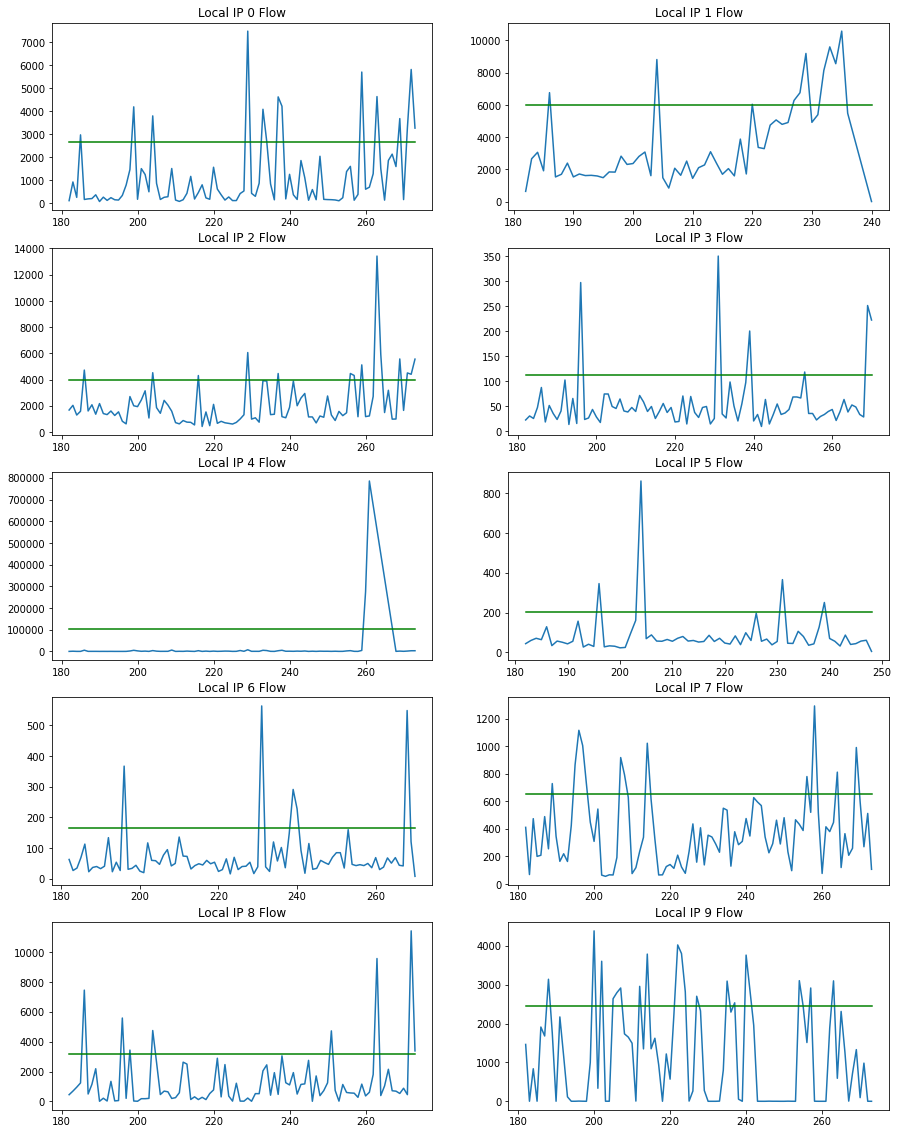

In [12]:
# Set the subplots 
f,axarray = plt.subplots(5,2,figsize=(15,20))

axarray[0,0].plot(ip0['yday'],ip0['f'])
axarray[0,0].plot(ip0['yday'], [ip0['f'].mean() + ip0['f'].std(ddof=0)]*len(ip0['yday']),color='g')
axarray[0,0].set_title("Local IP 0 Flow")

axarray[0,1].plot(ip1['yday'], ip1['f'])
axarray[0,1].plot(ip1['yday'], [ip1['f'].mean() + ip1['f'].std(ddof=0)]*len(ip1['yday']),color='g')
axarray[0,1].set_title("Local IP 1 Flow")

axarray[1,0].plot(ip2['yday'], ip2['f'])
axarray[1,0].set_title("Local IP 2 Flow")
axarray[1,0].plot(ip2['yday'], [ip2['f'].mean() + ip2['f'].std(ddof=0)]*len(ip2['yday']),color='g')

axarray[1,1].plot(ip3['yday'], ip3['f'])
axarray[1,1].set_title("Local IP 3 Flow")
axarray[1,1].plot(ip3['yday'], [ip3['f'].mean() + ip3['f'].std(ddof=0)]*len(ip3['yday']),color='g')

axarray[2,0].plot(ip4['yday'], ip4['f'])
axarray[2,0].set_title("Local IP 4 Flow")
axarray[2,0].plot(ip4['yday'], [ip4['f'].mean() + ip4['f'].std(ddof=0)]*len(ip4['yday']),color='g')

axarray[2,1].plot(ip5['yday'], ip5['f'])
axarray[2,1].set_title("Local IP 5 Flow")
axarray[2,1].plot(ip5['yday'], [ip5['f'].mean() + ip5['f'].std(ddof=0)]*len(ip5['yday']),color='g')

axarray[3,0].plot(ip6['yday'], ip6['f'])
axarray[3,0].set_title("Local IP 6 Flow")
axarray[3,0].plot(ip6['yday'], [ip6['f'].mean() + ip6['f'].std(ddof=0)]*len(ip6['yday']),color='g')

axarray[3,1].plot(ip7['yday'], ip7['f'])
axarray[3,1].set_title("Local IP 7 Flow")
axarray[3,1].plot(ip7['yday'], [ip7['f'].mean() + ip7['f'].std(ddof=0)]*len(ip7['yday']),color='g')

axarray[4,0].plot(ip8['yday'], ip8['f'])
axarray[4,0].set_title("Local IP 8 Flow")
axarray[4,0].plot(ip8['yday'], [ip8['f'].mean() + ip8['f'].std(ddof=0)]*len(ip8['yday']),color='g')

axarray[4,1].plot(ip9['yday'], ip9['f'])
axarray[4,1].set_title("Local IP 9 Flow")
axarray[4,1].plot(ip9['yday'], [ip9['f'].mean() + ip9['f'].std(ddof=0)]*len(ip9['yday']),color='g')

Agora plotamos os gráficos de barra de acordo com a quantidade de fluxo por DIA DA SEMANA

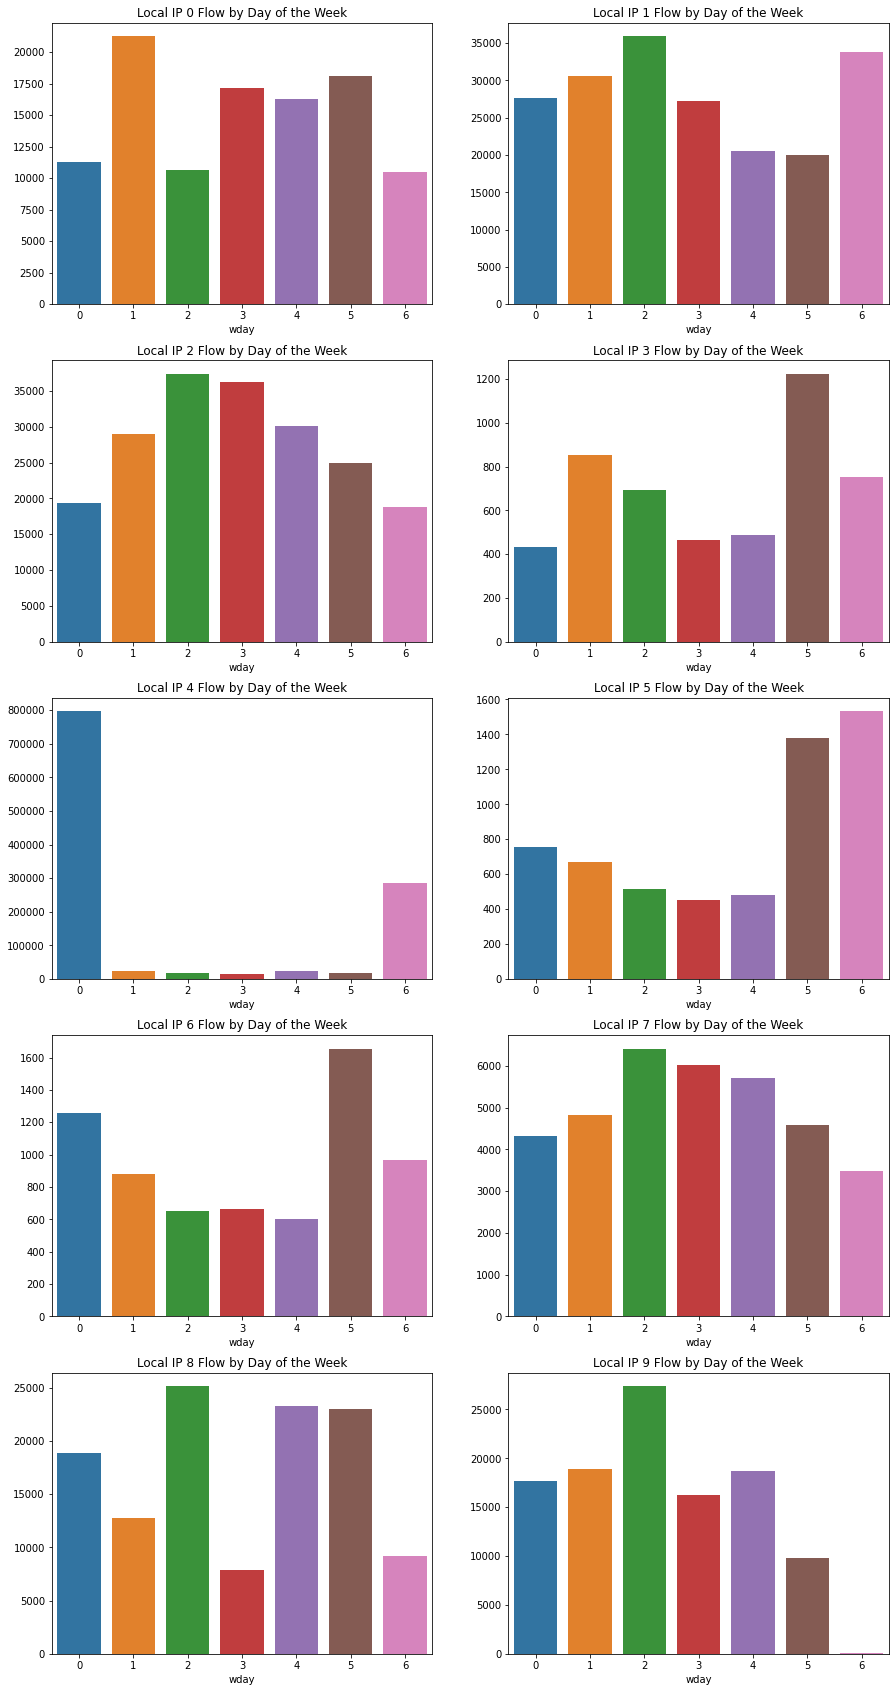

In [6]:
# Set the subplots
f,axarray = plt.subplots(5,2,figsize=(15,30))

sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip0.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[0,0])
axarray[0,0].set_title("Local IP 0 Flow by Day of the Week")

sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip1.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[0,1])
axarray[0,1].set_title("Local IP 1 Flow by Day of the Week")

sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip2.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[1,0])
axarray[1,0].set_title("Local IP 2 Flow by Day of the Week")

sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip3.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[1,1])
axarray[1,1].set_title("Local IP 3 Flow by Day of the Week")

sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip4.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[2,0])
axarray[2,0].set_title("Local IP 4 Flow by Day of the Week")

sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip5.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[2,1])
axarray[2,1].set_title("Local IP 5 Flow by Day of the Week")

sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip6.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[3,0])
axarray[3,0].set_title("Local IP 6 Flow by Day of the Week")

sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip7.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[3,1])
axarray[3,1].set_title("Local IP 7 Flow by Day of the Week")

sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip8.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[4,0])
axarray[4,0].set_title("Local IP 8 Flow by Day of the Week")

sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip9.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[4,1])
axarray[4,1].set_title("Local IP 9 Flow by Day of the Week")

plt.show()

## Criação e Treinamento da Recurrent Neural Network

Redes Neurais Recorrentes (RNNs) são um tipo especial de NN onde as conexões entre os neurônios criam ciclos que as fazem dependentes não apenas da entrada atual, mas também de um número n de entradas anteriores. Dessa forma, elas são são mais precisas e eficientes na predição de séries temporais.

Para treinar uma RNN é preciso criar um dataset de features onde CADA linha contenha uma sequência das n observações anteriores (variável lookback), junto do dia da semana, e o valor alvo (y_train) é o fluxo para ser previsto para o dia atual.

In [7]:
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers.wrappers import TimeDistributed
from keras.constraints import nonneg

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

look_back = 14

Para trabalhar melhor com os dados em uma RNN, primeiro iremos normalizar as 10 listas de fluxos de dados.

In [8]:
fv =[float(v)/float(max0) for v in ip0['f'].values]
ip0.loc[:,'f'] =np.array(fv).reshape(-1,1)

fv =[float(v)/float(max1) for v in ip1['f'].values]
ip1.loc[:,'f'] =np.array(fv).reshape(-1,1)

fv =[float(v)/float(max2) for v in ip2['f'].values]
ip2.loc[:,'f'] =np.array(fv).reshape(-1,1)

fv =[float(v)/float(max3) for v in ip3['f'].values]
ip3.loc[:,'f'] =np.array(fv).reshape(-1,1)

fv =[float(v)/float(max4) for v in ip4['f'].values]
ip4.loc[:,'f'] =np.array(fv).reshape(-1,1)

fv =[float(v)/float(max5) for v in ip5['f'].values]
ip5.loc[:,'f'] =np.array(fv).reshape(-1,1)

fv =[float(v)/float(max6) for v in ip6['f'].values]
ip6.loc[:,'f'] =np.array(fv).reshape(-1,1)

fv =[float(v)/float(max7) for v in ip7['f'].values]
ip7.loc[:,'f'] =np.array(fv).reshape(-1,1)

fv =[float(v)/float(max8) for v in ip8['f'].values]
ip8.loc[:,'f'] =np.array(fv).reshape(-1,1)

fv =[float(v)/float(max9) for v in ip9['f'].values]
ip9.loc[:,'f'] =np.array(fv).reshape(-1,1)  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


## Funções auxiliares

### Criar Dataset

Essa função cria uma lista de features e de valores alvos para o modelo

### Plotando gráficos
Essa função plota os gráficos comparativos de valores de Acurácia (Accuracy) X Perda (Loss) de cada modelo treinado

### Treinar o Modelo

Essa função treina um modelo de RNN utilizando o modo Sequential do Keras

### Predizer o Fluxo

Essa função realiza uma predição do fluxo com o modelo treinado

In [13]:
class Keras_RNN:

  def __init__(self, number):
    self.number = number

  def create_dataset(self, dataset, look_back=1):    
      dataX, dataY = [], []     

      for i in range(len(dataset)-look_back-1):        
          a = dataset[i:(i+look_back)].values
          dataX.append(a)
          dataY.append(dataset['f'].iloc[i + look_back])
      
      return np.array(dataX), np.array(dataY)

  def plot_graphs(self, number, history, acc_string, loss_string):    
      plt.plot(history.history[acc_string])
      plt.plot(history.history[loss_string])   
      plt.xlabel("Epochs")
      plt.ylabel(acc_string)
      plt.legend([acc_string, loss_string])   
      plt.title("Local IP " + number + " Accuracy and Loss") 
      plt.show()

  def trainModel(self, number, data):
      data['f'] = data['f'].astype('float32')
      train = data[0:look_back*5].copy()
      trainX, trainY = self.create_dataset(train, look_back)
      trainX = np.reshape(trainX, (trainX.shape[0], look_back, 2))   
      
      model = Sequential()
      model.add(GRU(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
      model.add(GRU(32))
      model.add(Dense(1))
      model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])    
      
      history = model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=0)          
      
      print("Trained!")

      return model, history

  def predictFlow(self, model, data):
      ypred=[0]*look_back
      
      for k in range(len(data)-look_back):
          pattern = data[k:k+look_back].values
          x = np.reshape(pattern, (1, len(pattern), 2))
          ypred.append(model.predict(x)[0][0])
      
      return ypred
  

Definidas a classe para a RNN e suas funções, agora é podemos primeiro treinar 10 modelos diferentes para cada uma das listas de fluxo

Model for ip0: 
Trained!


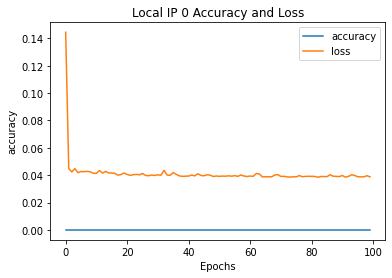

Model for ip1: 
Trained!


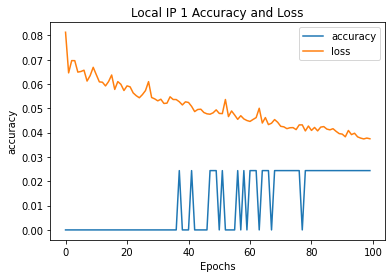

Model for ip2: 
Trained!


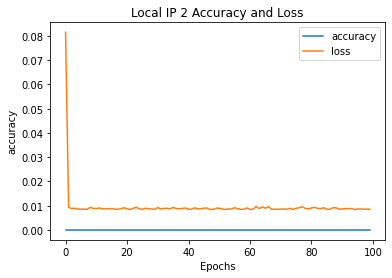

Model for ip3: 
Trained!


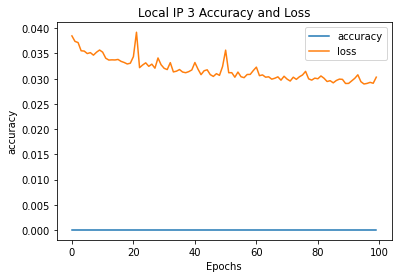

Model for ip4: 
Trained!


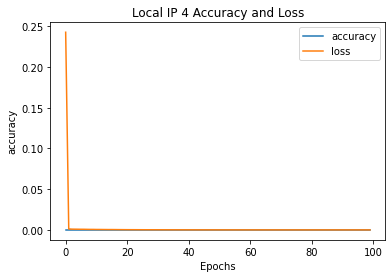

Model for ip5: 
Trained!


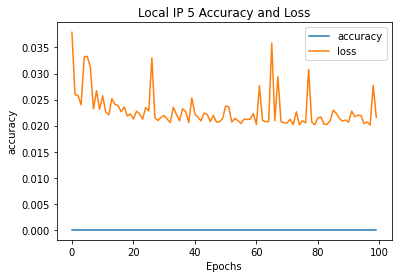

Model for ip6: 
Trained!


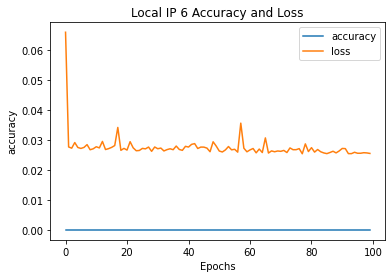

Model for ip7: 
Trained!


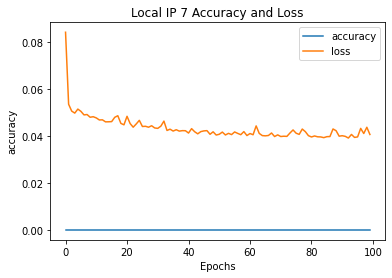

Model for ip8: 
Trained!


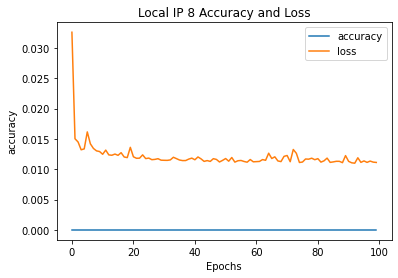

Model for ip9: 
Trained!


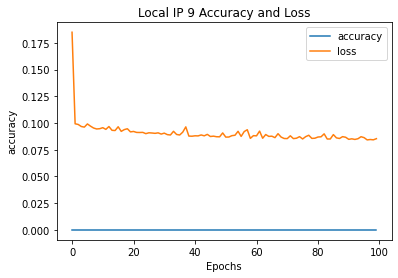

In [16]:
print("Model for ip0: ")
rnn_ip0 = Keras_RNN('0')
m0, history0 = rnn_ip0.trainModel(rnn_ip0.number, ip0[['f','wday']].copy())
rnn_ip0.plot_graphs(rnn_ip0.number, history0, 'accuracy', 'loss')

print("Model for ip1: ")
rnn_ip1 = Keras_RNN('1')
m1, history1 = rnn_ip1.trainModel(rnn_ip1.number, ip1[['f','wday']].copy())
rnn_ip1.plot_graphs(rnn_ip1.number, history1, 'accuracy', 'loss')

print("Model for ip2: ")
rnn_ip2 = Keras_RNN('2')
m2, history2 = rnn_ip1.trainModel(rnn_ip2.number, ip2[['f','wday']].copy())
rnn_ip2.plot_graphs(rnn_ip2.number, history2, 'accuracy', 'loss')

print("Model for ip3: ")
rnn_ip3 = Keras_RNN('3')
m3, history3 = rnn_ip3.trainModel(rnn_ip3.number, ip3[['f','wday']].copy())
rnn_ip3.plot_graphs(rnn_ip3.number, history3, 'accuracy', 'loss')

print("Model for ip4: ")
rnn_ip4 = Keras_RNN('4')
m4, history4 = rnn_ip4.trainModel(rnn_ip4.number, ip4[['f','wday']].copy())
rnn_ip4.plot_graphs(rnn_ip4.number, history4, 'accuracy', 'loss')

print("Model for ip5: ")
rnn_ip5 = Keras_RNN('5')
m5, history5 = rnn_ip5.trainModel(rnn_ip5.number, ip5[['f','wday']].copy())
rnn_ip5.plot_graphs(rnn_ip5.number, history5, 'accuracy', 'loss')

print("Model for ip6: ")
rnn_ip6 = Keras_RNN('6')
m6, history6 = rnn_ip6.trainModel(rnn_ip6.number, ip6[['f','wday']].copy())
rnn_ip6.plot_graphs(rnn_ip6.number, history6, 'accuracy', 'loss')

print("Model for ip7: ")
rnn_ip7 = Keras_RNN('7')
m7, history7 = rnn_ip7.trainModel(rnn_ip7.number, ip7[['f','wday']].copy())
rnn_ip7.plot_graphs(rnn_ip7.number, history7, 'accuracy', 'loss')

print("Model for ip8: ")
rnn_ip8 = Keras_RNN('8')
m8, history8 = rnn_ip8.trainModel(rnn_ip8.number, ip8[['f','wday']].copy())
rnn_ip8.plot_graphs(rnn_ip8.number, history8, 'accuracy', 'loss')

print("Model for ip9: ")
rnn_ip9 = Keras_RNN('9')
m9, history9 = rnn_ip9.trainModel(rnn_ip9.number, ip9[['f','wday']].copy())
rnn_ip9.plot_graphs(rnn_ip9.number, history9, 'accuracy', 'loss')

## Calculando o Fluxo Previsto

Com os modelos de RNN treinados, podemos calcular o fluxo previsto para cada uma das estações de rede

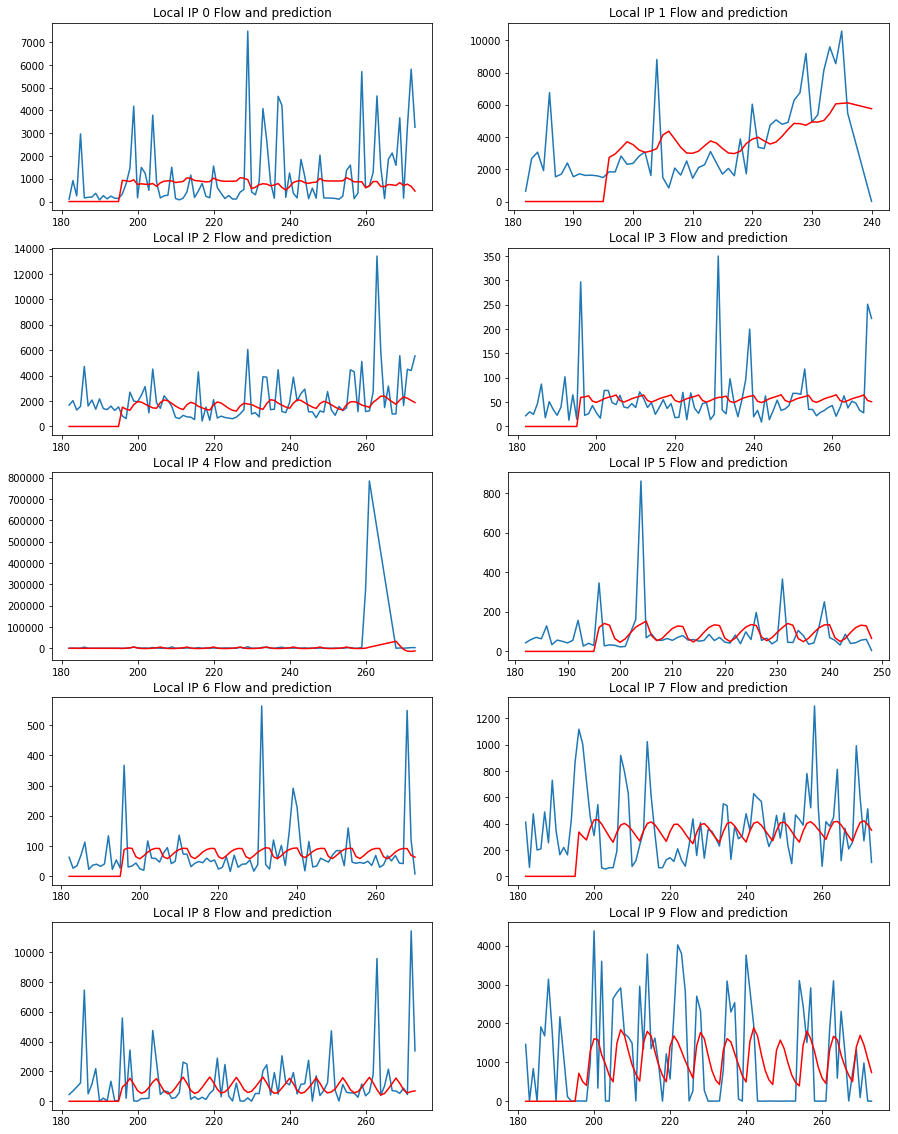

In [17]:
# Calculate the predicted flow
ypred0 = np.multiply(rnn_ip0.predictFlow(m0,ip0[['f','wday']].copy()),max0)
ip0f = np.multiply(ip0['f'],max0)

ypred1 = np.multiply(rnn_ip1.predictFlow(m1,ip1[['f','wday']].copy()),max1)
ip1f = np.multiply(ip1['f'],max1)

ypred2 = np.multiply(rnn_ip2.predictFlow(m2,ip2[['f','wday']].copy()),max2)
ip2f = np.multiply(ip2['f'],max2)

ypred3 = np.multiply(rnn_ip3.predictFlow(m3,ip3[['f','wday']].copy()),max3)
ip3f = np.multiply(ip3['f'],max3)

ypred4 = np.multiply(rnn_ip4.predictFlow(m4,ip4[['f','wday']].copy()),max4)
ip4f = np.multiply(ip4['f'],max4)

ypred5 = np.multiply(rnn_ip5.predictFlow(m5,ip5[['f','wday']].copy()),max5)
ip5f = np.multiply(ip5['f'],max5)

ypred6 = np.multiply(rnn_ip6.predictFlow(m6,ip6[['f','wday']].copy()),max6)
ip6f = np.multiply(ip6['f'],max6)

ypred7 = np.multiply(rnn_ip7.predictFlow(m7,ip7[['f','wday']].copy()),max7)
ip7f = np.multiply(ip7['f'],max7)

ypred8 = np.multiply(rnn_ip8.predictFlow(m8,ip8[['f','wday']].copy()),max8)
ip8f = np.multiply(ip8['f'],max8)

ypred9 = np.multiply(rnn_ip9.predictFlow(m9,ip9[['f','wday']].copy()),max9)
ip9f = np.multiply(ip9['f'],max9)

## Plotando os gráficos de predição

Após realizar a predição do fluxo da rede, podemos plotar os gráficos de cada estação de rede e comparar o fluxo original e o fluxo previsto pelo modelo da RNN

In [ ]:
# Set the subplots
f,axarray = plt.subplots(5,2,figsize=(15,20))

# Plot the original flow and the predicted flow
axarray[0,0].plot(ip0['yday'], ip0f)
axarray[0,0].plot(ip0['yday'], ypred0, color='r',alpha=1)
axarray[0,0].set_title("Local IP 0 Flow and prediction")

axarray[0,1].plot(ip1['yday'], ip1f)
axarray[0,1].plot(ip1['yday'], ypred1, color='r',alpha=1)
axarray[0,1].set_title("Local IP 1 Flow and prediction")

axarray[1,0].plot(ip2['yday'], ip2f)
axarray[1,0].plot(ip2['yday'], ypred2, color='r',alpha=1)
axarray[1,0].set_title("Local IP 2 Flow and prediction")

axarray[1,1].plot(ip3['yday'], ip3f)
axarray[1,1].plot(ip3['yday'], ypred3,color='r',alpha=1)
axarray[1,1].set_title("Local IP 3 Flow and prediction")

axarray[2,0].plot(ip4['yday'], ip4f)
axarray[2,0].plot(ip4['yday'], ypred4,color='r',alpha=1)
axarray[2,0].set_title("Local IP 4 Flow and prediction")

axarray[2,1].plot(ip5['yday'], ip5f)
axarray[2,1].plot(ip5['yday'], ypred5, color='r',alpha=1)
axarray[2,1].set_title("Local IP 5 Flow and prediction")

axarray[3,0].plot(ip6['yday'], ip6f)
axarray[3,0].plot(ip6['yday'], ypred6, color='r',alpha=1)
axarray[3,0].set_title("Local IP 6 Flow and prediction")

axarray[3,1].plot(ip7['yday'], ip7f)
axarray[3,1].plot(ip7['yday'], ypred7, color='r',alpha=1)
axarray[3,1].set_title("Local IP 7 Flow and prediction")

axarray[4,0].plot(ip8['yday'], ip8f)
axarray[4,0].plot(ip8['yday'], ypred8, color='r',alpha=1)
axarray[4,0].set_title("Local IP 8 Flow and prediction")

axarray[4,1].plot(ip9['yday'], ip9f)
axarray[4,1].plot(ip9['yday'], ypred9, color='r',alpha=1)
axarray[4,1].set_title("Local IP 9 Flow and prediction")

plt.show()

### Correlação estatística

Para avaliar o desempenho dos modelos treinados pela RNN para prever os dados de fluxo da rede, podemos utilizar uma função de correlação estatística para verificar 

In [18]:
corr0 = pd.Series(ip0f).corr(pd.Series(ypred0))
corr1 = pd.Series(ip1f).corr(pd.Series(ypred1))
corr2 = pd.Series(ip2f).corr(pd.Series(ypred2))
corr3 = pd.Series(ip3f).corr(pd.Series(ypred3))
corr4 = pd.Series(ip4f).corr(pd.Series(ypred4))
corr5 = pd.Series(ip5f).corr(pd.Series(ypred5))
corr6 = pd.Series(ip6f).corr(pd.Series(ypred6))
corr7 = pd.Series(ip7f).corr(pd.Series(ypred7))
corr8 = pd.Series(ip8f).corr(pd.Series(ypred8))
corr9 = pd.Series(ip9f).corr(pd.Series(ypred9))
corrdf = pd.DataFrame({'corr0':[corr0], 'corr1':[corr1], 'corr2':[corr2], 'corr3':[corr3], 'corr4':[corr4], 'corr5':[corr5], 'corr6':[corr6], 'corr7':[corr7], 'corr8':[corr8], 'corr9':[corr9]})

# Print correlation coeficients
corrdf.head()

,corr0,corr1,corr2,corr3,corr4,corr5,corr6,corr7,corr8,corr9
0,0.070832,0.226289,0.04911,0.365738,0.219243,-0.014136,-0.390455,-0.134138,-0.047952,-0.480591
